**Week 7 Homework**


In [294]:
# Importing the important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [295]:
# Importing the Iris Dataset 
iris = datasets.load_iris()

In [296]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [297]:
df = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

In [298]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [299]:
df.shape

(150, 5)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [301]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [302]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [303]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [304]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [305]:
X=df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y=df['species']

In [306]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [307]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=2000, max_depth=2)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

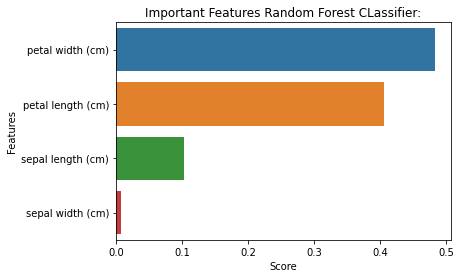

In [308]:
# Finding the most important features.
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Important Features Random Forest CLassifier:")
plt.show()

In [309]:
print("Feature importance in percentage:",'\n',feature_imp*100)

Feature importance in percentage: 
 petal width (cm)     48.330146
petal length (cm)    40.655704
sepal length (cm)    10.287230
sepal width (cm)      0.726920
dtype: float64


**As we can see the Petal Lenght is the most important feature followed by petal width and sepal lenght and lastly sepal width.**

In [310]:
# Model Accuracy of Gaussian random forest classifier.
print("Accuracy of Gaussian Random Forest Classifier:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Gaussian Random Forest Classifier: 93.33333333333333


In [311]:
model_2 = GradientBoostingClassifier(n_estimators=2000, max_depth=2)
model_2.fit(X_train, y_train)
y_predGB=model_2.predict(X_test)

In [312]:
# Model Accuracy of Gradient Boosting Algorithm.
print("Accuracy of GB Algorithm:",metrics.accuracy_score(y_test, y_predGB)*100)

Accuracy of GB Algorithm: 93.33333333333333


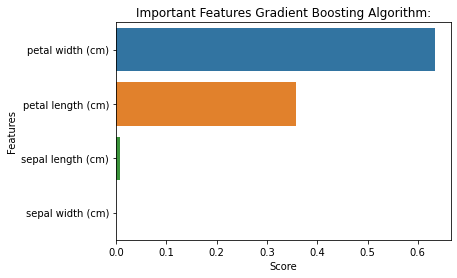

In [313]:
# Finding the most important features for GB algorithm.
feature_impGB = pd.Series(model_2.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
sns.barplot(x=feature_impGB, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Important Features Gradient Boosting Algorithm:")
plt.show()

In [314]:
# Feature Importance for GB algorithm
print("Feature importance in percentage:",'\n',feature_impGB*100)

Feature importance in percentage: 
 petal width (cm)     63.378174
petal length (cm)    35.816614
sepal length (cm)     0.805213
sepal width (cm)      0.000000
dtype: float64


In [315]:
# Feature importance for Gaussian Random Forest classifier
print("Feature importance in percentage:",'\n',feature_imp*100)

Feature importance in percentage: 
 petal width (cm)     48.330146
petal length (cm)    40.655704
sepal length (cm)    10.287230
sepal width (cm)      0.726920
dtype: float64


**Did the Gradient Boosting model perform better? Are there any reservations about GB and why?**
- As seen in the above models, there is no significant diffeence in performance if both the models. Both the models performed with the same accuracy on the same data. However, the feature importance differs significantly in these models.

**Reservations of GB:**
- Gradient Boosting Models will continue to improve in order to reduce all errors to a minimum. This can lead to overfitting by exaggerating outliers. Computationally expensive - frequently necessitates a large number of trees, which can take a long time and consume a lot of memory.